In [34]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [36]:
len(X_train), len(y_test)

(60000, 10000)

In [37]:
X_train[0].shape

(28, 28)

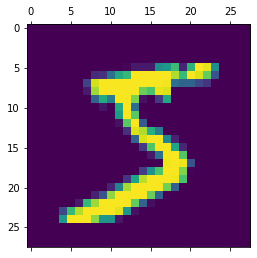

In [38]:
plt.matshow(X_train[0])

In [39]:
y_train[2]

4

In [40]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

We're going to flatten the image because we want to convert (28,28) into single dimensional array

In [41]:
X_train.shape

(60000, 28, 28)

In [42]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [43]:
X_test_flattened.shape

(10000, 784)

In [44]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [45]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
             )

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 18.5594 - accuracy: 0.7681
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.9818 - accuracy: 0.8800
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 5.5976 - accuracy: 0.8841
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.2959 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.2444 - accuracy: 0.8882


How to improve the accuracy ?

The value is between 0 & 255 if we divide this whole array by 255 it will be scale the value will become between 0 &1

In [46]:
X_train = X_train / 255
X_test = X_test / 255

In [47]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [48]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
             )

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7157 - accuracy: 0.8156
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3017 - accuracy: 0.9166: 0s - loss:
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2869 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2680 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2683 - accuracy: 0.9254


In [49]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2678 - accuracy: 0.9265


[0.26779499650001526, 0.9265000224113464]

In [50]:
model.predict(X_test_flattened)

array([[2.7627647e-02, 5.0039847e-07, 6.7426622e-02, ..., 9.9976945e-01,
        7.9440683e-02, 6.5485775e-01],
       [4.9481913e-01, 8.5499287e-03, 9.9974895e-01, ..., 6.8493735e-13,
        1.5520668e-01, 3.2277292e-09],
       [5.2085519e-04, 9.9539101e-01, 7.0501268e-01, ..., 1.5738088e-01,
        3.7104058e-01, 4.3297648e-02],
       ...,
       [6.3871912e-06, 8.0296522e-06, 1.8669963e-03, ..., 2.9890558e-01,
        4.3557560e-01, 7.6685035e-01],
       [2.4548173e-04, 2.2646785e-04, 3.1101704e-04, ..., 4.0931915e-05,
        5.7992083e-01, 9.5751922e-05],
       [1.1276126e-02, 6.4889005e-10, 3.2209221e-01, ..., 1.0904594e-08,
        2.3615360e-04, 9.6169231e-07]], dtype=float32)

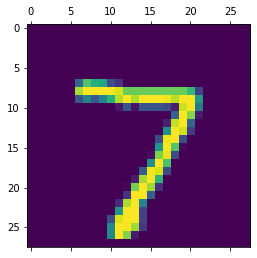

In [51]:
plt.matshow(X_test[0])

In [52]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.76276469e-02, 5.00398471e-07, 6.74266219e-02, 9.52534080e-01,
       1.92552805e-03, 1.23108774e-01, 1.45349065e-06, 9.99769449e-01,
       7.94406831e-02, 6.54857755e-01], dtype=float32)

In [53]:
np.argmax(y_predicted[0]) #good job we done it

7

In [54]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [55]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

cm = confusion matrix

In [56]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1118,    4,    1,    0,    1,    4,    2,    5,    0],
       [   4,    9,  950,    6,    6,    3,   11,    9,   29,    5],
       [   4,    1,   33,  903,    0,   29,    2,   11,   19,    8],
       [   1,    3,    7,    1,  906,    0,   10,    4,    8,   42],
       [  10,    3,    8,   25,    9,  782,   14,    6,   29,    6],
       [  13,    3,   10,    1,    7,   11,  911,    2,    0,    0],
       [   1,    7,   26,    4,    6,    0,    0,  951,    2,   31],
       [   8,   15,   10,   18,    8,   25,   10,   13,  859,    8],
       [  10,    7,    2,   10,   21,    7,    0,   26,    5,  921]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

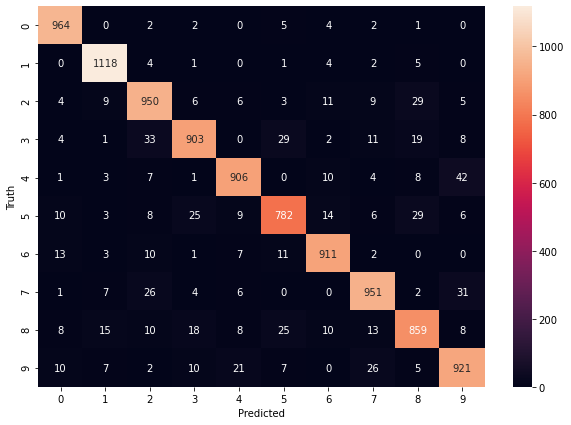

In [57]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Adding a hidden layer neuron

In [58]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
             )

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4545 - accuracy: 0.8740
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1374 - accuracy: 0.9611
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0892 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0673 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0512 - accuracy: 0.9851


Performance on Test Set

In [59]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0949 - accuracy: 0.9717


[0.09486104547977448, 0.9717000126838684]

Text(69.0, 0.5, 'Truth')

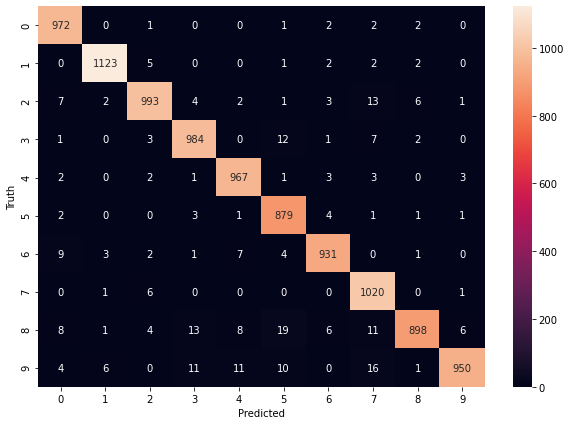

In [60]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Now, we don't want to flatten the .
we can do that with the help of keras flatten

In [63]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

#tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4505 - accuracy: 0.8756
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1326 - accuracy: 0.9605
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0858 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0673 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0494 - accuracy: 0.9851
